Category: lung_aca, Number of images: 5000
Category: lung_n, Number of images: 5000
Category: lung_scc, Number of images: 5000


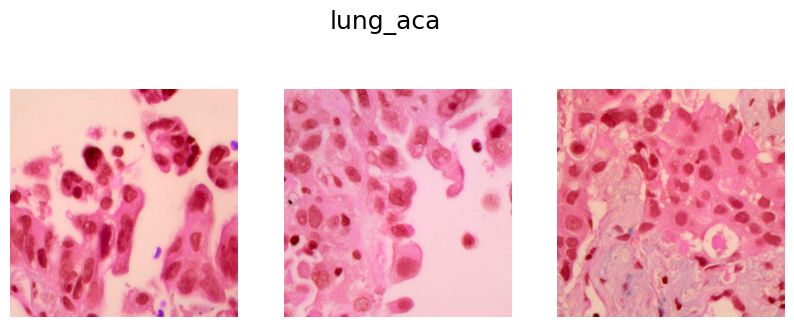

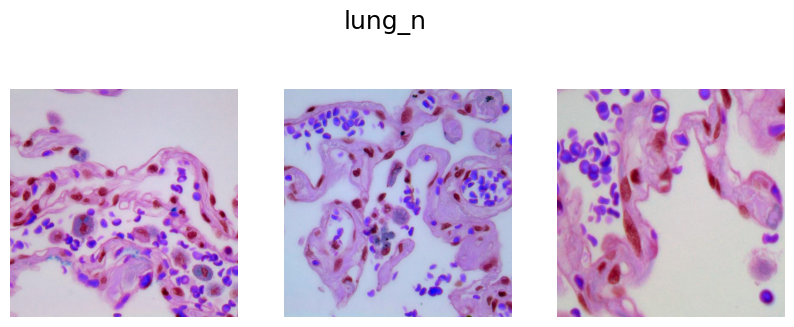

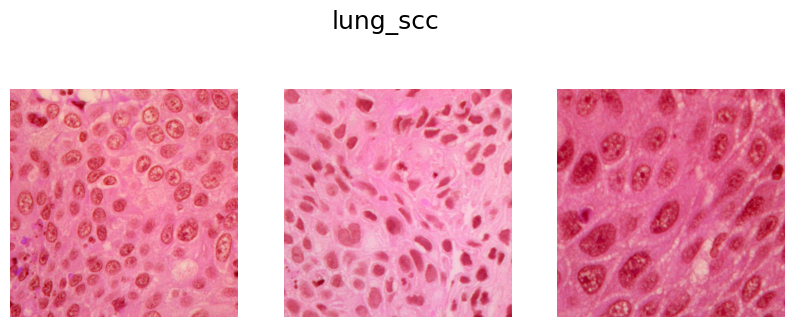

In [1]:
import os
import matplotlib.pyplot as plt # type: ignore
import numpy as np
import cv2
DATADIR = r"C:\Users\Lenovo\OneDrive\Desktop\project\lung_image_sets"
CATEGORIES = ['lung_aca','lung_n','lung_scc'] 
#lung_adenocarcinomas,lung_normal,lung_squamous_cell_carcinomas
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    # Check if the path exists
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        continue
    
    try:
        images = os.listdir(path)
        print(f"Category: {category}, Number of images: {len(images)}")
    except Exception as e:
        print(f"Error reading images from {path}: {e}")
     
     
    fig,ax=plt.subplots(1,3,figsize=(10,4))
    fig.suptitle(f"{category}",fontsize=18)
    
    for i in range(3):
        img_name=images[np.random.randint(0,len(images))]
        img_path=os.path.join(path,img_name)
        img_array=cv2.imread(img_path)
        
        ax[i].imshow(img_array)
        ax[i].axis('off')
        
        

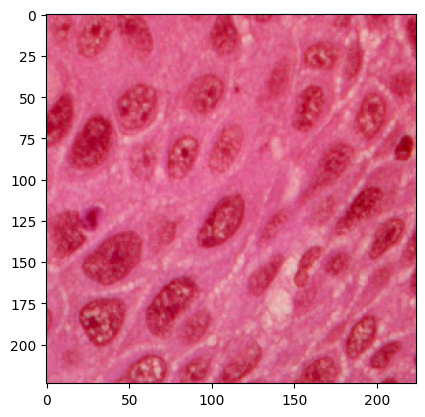

In [2]:
IMG_SIZE=224
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)

In [3]:
#creating train data
training_data=[]
def create_train_data():
    for category in CATEGORIES:
          path = os.path.join(DATADIR, category)
          labels=CATEGORIES.index(category)
          for img in os.listdir(path):
            try:
              img_array=cv2.imread(os.path.join(path,img))  
              new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
              training_data.append([new_array,labels])
            except Exception as e:
                pass
   
create_train_data()          
                    

In [4]:
len(training_data)

15000

In [5]:
x=[]
y=[]
for features,labels in training_data:
    x.append(features)
    y.append(labels)
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y=np.array(y)
type(x),type(y)    

(numpy.ndarray, numpy.ndarray)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
print(f"x_train length : {x_train.shape[0]},y_train image size :{x_train.shape[1:3]},x_train channel Dimension:{x_train.shape[3]}")
print(f"x_test length : {x_test.shape[0]},y_test image size :{x_test.shape[1:3]},x_test channel Dimension:{x_test.shape[3]}")


MemoryError: Unable to allocate 1.68 GiB for an array with shape (12000, 224, 224, 3) and data type uint8

In [ ]:
#vgg model building
import tensorflow as tf
from tensorflow import keras 
from keras.applications import vgg16
vgg=vgg16.VGG16(weights ="imagenet",include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

In [ ]:
for layer in vgg.layers:
    layer.trainable=False
# adding the top layers
model=keras.Sequential([vgg,
    keras.layers.GlobalAveragePooling2D(),
keras.layers.Dense(1024,activation='relu'),
keras.layers.Dense(512, activation='relu'), 
keras.layers.Dense(3, activation='softmax'), 
])

 
 

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 817s 2s/step - accuracy: 0.8970 - loss: 0.4869


In [ ]:
"""loss,accuracy=model.evaluate(x_test,y_test)
print(f'model accuracy :{accuracy *100}')"""


"loss,accuracy=model.evaluate(x_test,y_test)\nprint(f'model accuracy :{accuracy *100}')"

In [ ]:
#print(f'model accuracy :{accuracy *100}')

In [ ]:
"""import os
from keras.models import load_model

model_path = 'model.h5'

if os.path.exists(model_path):
    try:
        input_shape = (224, 224, 3)
        model  = tf.keras.models.load_model('model.h5', compile=False, custom_objects={'input_shape': input_shape})
        
    except Exception as e:
        print(f"Error loading model: {e.__class__.__name__}: {e}")
else:
    print("Model file does not exist.")"""





'import os\nfrom keras.models import load_model\n\nmodel_path = \'model.h5\'\n\nif os.path.exists(model_path):\n    try:\n        input_shape = (224, 224, 3)\n        model  = tf.keras.models.load_model(\'model.h5\', compile=False, custom_objects={\'input_shape\': input_shape})\n        \n    except Exception as e:\n        print(f"Error loading model: {e.__class__.__name__}: {e}")\nelse:\n    print("Model file does not exist.")'

In [ ]:
model.save('model.keras')



In [ ]:
pred=np.argmax(model.predict(x_test[310:311]),axis=-1)
print(y_test[:5])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[2 1 2 0 1]
[0]


In [ ]:
import os
from PIL import Image

def get_last_image(directory):
    # Get a list of all files in the directory
    files = [os.path.join(directory, file) for file in os.listdir(directory)]

    # Filter out files that are not images by checking their extensions
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    if not image_files:
        print("No image files found in the directory.")
        return None

    # Find the most recent image file based on the modification time
    last_image_path = max(image_files, key=os.path.getmtime)

    # Open the last image using Pillow
    last_image = Image.open(last_image_path)

    print(f"Last image found: {last_image_path}")
    print(f"Image format: {last_image.format}, Size: {last_image.size}, Mode: {last_image.mode}")

    return last_image

# Directory where images are uploaded
uploads_dir = 'uploads'

# Extract the last image
last_image = get_last_image(uploads_dir)

if last_image:
    # Use the last image as a test image
    # Example: Resize the image to 200x200 pixels
    test_image = last_image.resize((224, 224))
    test_image_np = np.array(test_image)
      # Expand dimensions to match the input shape of the model (1, 224, 224, 3)
    test_image_np = np.expand_dims(test_image_np, axis=0)
    
    # Preprocess the image (if required by your model, use the appropriate preprocessing function)
   #test_image_np = preprocess_input(test_image_np)
import webbrowser

# Function to open the HTML file
def open_html_file():
    # Specify the path to your HTML file
    html_file_path = 'yourfile.html'
    webbrowser.open(html_file_path)

# Conditional check
condition = True  # Change this value to test the if-else logic

if condition:
    print("Condition is True, opening HTML file...")
    open_html_file()
else:
    print("Condition is False, not opening the HTML file.")

   

pred=np.argmax(model.predict(test_image_np),axis=-1)
if pred==0:
    print("Cancer Detected:lung_adenocarcinomas")
    html_file_path = 'ade.html'
    webbrowser.open(r"C:\Users\Lenovo\OneDrive\Desktop\project\your_flask_app\templates\ade.html")
elif pred==1:
    print("lung_normal : No cancer detected")
    html_file_path = 'normal.html'
    webbrowser.open(r"C:\Users\Lenovo\OneDrive\Desktop\project\your_flask_app\templates\normal.html")
else:
    print("Cancer Detected :lung_squamous_cell_carcinomas")  
    html_file_path = 'squa.html'
    webbrowser.open(r"C:\Users\Lenovo\OneDrive\Desktop\project\your_flask_app\templates\squa.html")
          
print(pred)    



Last image found: uploads\1011_lungn3.jpeg
Image format: JPEG, Size: (768, 768), Mode: RGB
Condition is True, opening HTML file...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
lung_normal : No cancer detected
[1]


In [ ]:
"""pred=np.argmax(model.predict(x_test),axis=-1)
print(y_test[:5])
print(pred[:5])
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
cf=confusion_matrix(y_test,pred,normalize='true')
import seaborn as sns
sns.heatmap(cf,annot=True,cmap='crest')
plt.xlabel('predicted')
plt.ylabel('actual') """

"pred=np.argmax(model.predict(x_test),axis=-1)\nprint(y_test[:5])\nprint(pred[:5])\nfrom sklearn.metrics import classification_report,confusion_matrix\nprint(classification_report(y_test,pred))\ncf=confusion_matrix(y_test,pred,normalize='true')\nimport seaborn as sns\nsns.heatmap(cf,annot=True,cmap='crest')\nplt.xlabel('predicted')\nplt.ylabel('actual') "

In [ ]:
pred=np.argmax(model.predict(x_test[310:311]),axis=-1)
print(y_test[:5])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[2 1 2 0 1]
[0]
